In [1]:
dataset = pd.read_csv (r"C:\Users\owner\OneDrive\Desktop\Data sets\Loan\loan_data_set.csv")

<IPython.core.display.Javascript object>

In [2]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
pd.crosstab (dataset [ 'Credit_History'], dataset ['Loan_Status'], margins=True)

<IPython.core.display.Javascript object>

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<IPython.core.display.Javascript object>

<AxesSubplot:>

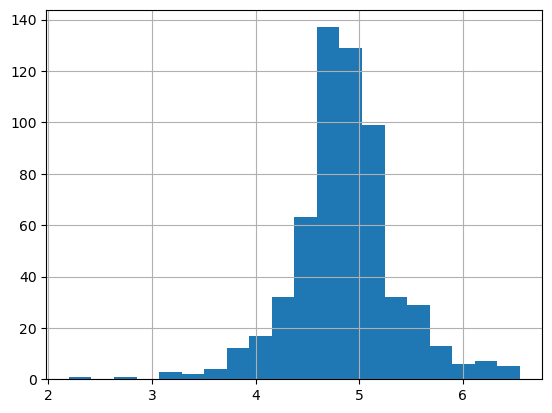

In [4]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

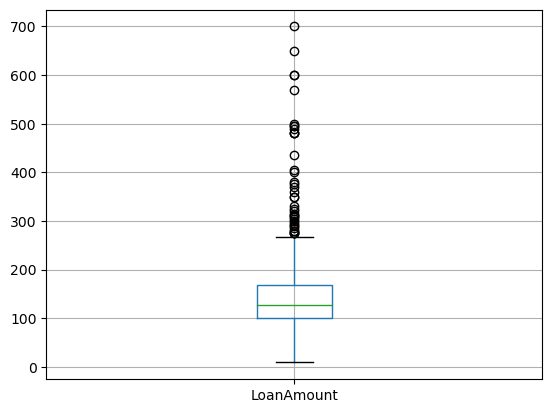

In [5]:
dataset.boxplot(column='LoanAmount')

<AxesSubplot:>

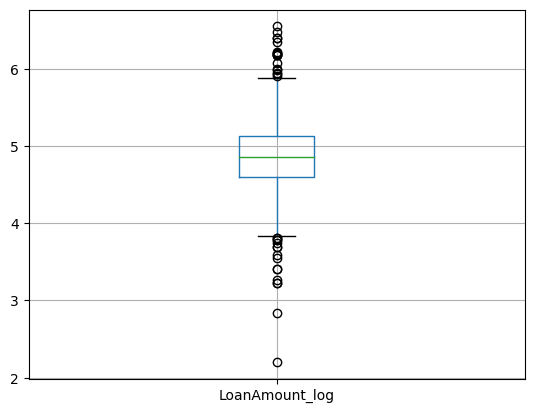

In [6]:
dataset.boxplot(column='LoanAmount_log')

In [7]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset ['Married'].fillna(dataset ['Married' ].mode()[0], inplace=True)
dataset [ 'Dependents'].fillna(dataset['Dependents' ].mode()[0], inplace=True)
dataset [ 'Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [8]:
dataset [ 'Credit_History'].fillna(dataset ['Credit_History'].mode()[0], inplace=True)

In [9]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [10]:
dataset [ 'TotalIncome'] = dataset [ 'ApplicantIncome'] + dataset ['CoapplicantIncome']
dataset ['TotalIncome_log'] = np.log(dataset['TotalIncome'])

<IPython.core.display.Javascript object>

<AxesSubplot:>

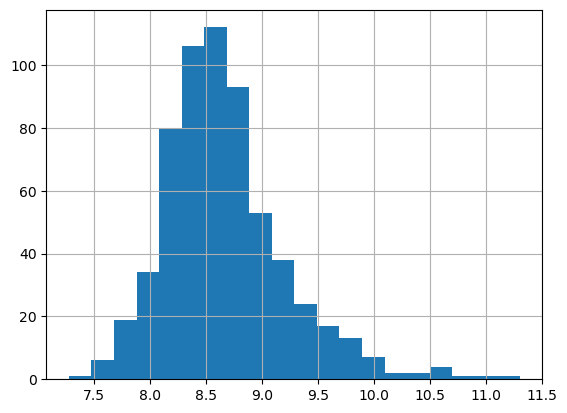

In [11]:
dataset['TotalIncome_log'].hist(bins=20)

In [12]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [13]:
dataset = dataset.replace(to_replace='3+', value=3)


In [14]:
dataset['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [15]:
# X= dataset.iloc[:,np,r_[1:5,9:11,13:15]].values
# y= dataset.iloc[:,12].values

X = dataset.drop(columns=['Loan_ID', 'Loan_Status','TotalIncome','LoanAmount','ApplicantIncome','CoapplicantIncome'], axis=1)
Y = dataset [ 'Loan_Status']

In [16]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,4.857444,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,4.948760,8.699515


In [17]:
X.shape

(614, 10)

In [18]:
X['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [19]:
pd.unique(X['Dependents'])

<IPython.core.display.Javascript object>

array(['0', '1', '2', 3], dtype=object)

In [20]:
np.unique(X['Dependents'], return_counts=True)

<IPython.core.display.Javascript object>

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
X=pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

In [25]:
X.head()

,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1.0,4.857444,8.674026,1,0,1,0,0,0,0,0,1
1,360.0,1.0,4.852030,8.714568,1,1,0,1,0,0,0,0,0
2,360.0,1.0,4.189655,8.006368,1,1,1,0,0,0,1,0,1
3,360.0,1.0,4.787492,8.505323,1,1,1,0,0,1,0,0,1
4,360.0,1.0,4.948760,8.699515,1,0,1,0,0,0,0,0,1


In [28]:
pd.get_dummies(Y)

<IPython.core.display.Javascript object>

,N,Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,1
610,0,1
611,0,1
612,0,1


In [30]:
# loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

Y.replace({'N':0,'Y':1},inplace=True)


In [31]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
from sklearn.pipeline import Pipeline


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc=RandomForestClassifier()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss-StandardScaler()
# X_train=ss.fit_transform (X_train)
# X_test=ss.fit_transform(X_test)

In [36]:
pipeline_rf=Pipeline([("ss",StandardScaler()),
                     ("rf_classifier",RandomForestClassifier())])

<IPython.core.display.Javascript object>

In [37]:
pipeline_rf

Pipeline(steps=[('ss', StandardScaler()),
                ('rf_classifier', RandomForestClassifier())])

In [38]:
 pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('rf_classifier', RandomForestClassifier())])

In [39]:
y_pred=pipeline_rf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
from sklearn import metrics
print('The accuracy of random forest is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of random forest is:  0.7723577235772358


In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform (X_train)
X_test=ss.fit_transform(X_test)

In [43]:
rfc.fit(X_train, y_train )

RandomForestClassifier()

In [44]:
y_pred=rfc.predict(X_test)

In [45]:
from sklearn import metrics
print('The accuracy of random forest is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of random forest is:  0.7967479674796748


In [46]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB ()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [47]:
y_pred= NBClassifier.predict(X_test)

In [48]:
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is:  0.8373983739837398


In [50]:
cv_score = cross_val_score(NBClassifier, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
cv_score

<IPython.core.display.Javascript object>

array([-0.42426407, -0.45175395, -0.40406102, -0.45175395, -0.42857143,
       -0.40406102, -0.57142857, -0.45175395, -0.42857143, -0.42857143])

In [51]:
cv_score.mean()

-0.44447908158544314

In [52]:
cv_score_rfc = cross_val_score(rfc, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
cv_score_rfc

<IPython.core.display.Javascript object>

array([-0.42426407, -0.31943828, -0.49487166, -0.47380354, -0.45175395,
       -0.47380354, -0.60609153, -0.42857143, -0.40406102, -0.47380354])

In [53]:
cv_score_rfc.mean()

-0.4550462559531585

In [54]:
import os
os.getcwd()

'C:\\Users\\owner\\OneDrive\\Desktop\\Internship'

In [55]:
cd C:\Users\owner\OneDrive\Desktop\Data sets\Loan

C:\Users\owner\OneDrive\Desktop\Data sets\Loan


In [56]:
os.getcwd()

'C:\\Users\\owner\\OneDrive\\Desktop\\Data sets\\Loan'

In [57]:
dataset.to_csv('pre-processed_data.csv')

In [58]:
X.shape

(614, 13)